<a href="https://colab.research.google.com/github/TasneemBadry/TasneemBadry/blob/main/Final_Version_DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
from sklearn.neural_network import MLPClassifier


In [ ]:
df = pd.read_csv("train.csv")
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [ ]:
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [ ]:
df.shape

(990, 194)

In [ ]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
df.head(0)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64


In [ ]:
#to check if we have nulls
total = df.isnull().sum().sort_values(ascending=False)
print(total)
df = df.drop(['id'], axis=1)

id           0
texture16    0
shape58      0
shape59      0
shape60      0
            ..
shape2       0
shape3       0
shape4       0
shape5       0
texture64    0
Length: 194, dtype: int64


# visualizing

<AxesSubplot:xlabel='species'>

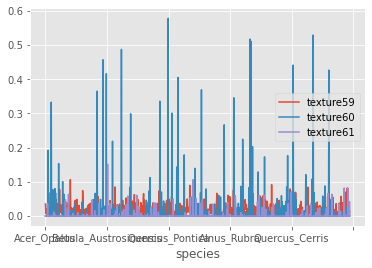

In [ ]:
#Let’s start with a plot displaying the following columns
df.plot(x="species", y=["texture59", "texture60", "texture61"])

<AxesSubplot:xlabel='species'>

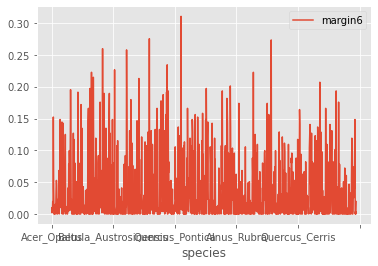

In [ ]:
df.plot(x="species", y=["margin6"])

<AxesSubplot:ylabel='Frequency'>

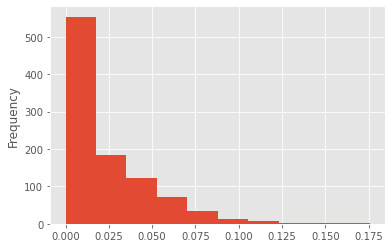

In [ ]:
#let's plot a histogram
col=df['texture46']
col.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

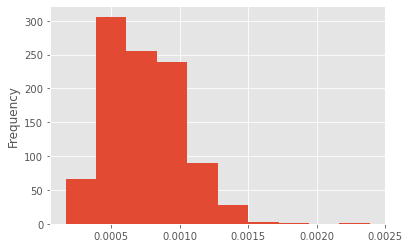

In [ ]:
col=df['shape1']
col.plot(kind="hist")

# some images

In [ ]:
from PIL import Image
#read the image
im = Image.open("1.jpg")
#show image
im.show()
#a window will pop up opening photo

In [ ]:
im = Image.open("2.jpg")
im.show()

In [ ]:
im = Image.open("3.jpg")
im.show()

In [ ]:
im = Image.open("4.jpg")
im.show()

In [ ]:
im = Image.open("5.jpg")
im.show()

In [ ]:
im = Image.open("6.jpg")
im.show()

# encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df [['species']]= df[['species']].apply(le.fit_transform)

# data split

In [ ]:
X = df.drop(['species'], axis=1).values
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# part2

In [ ]:
#adam
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(32 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
from tensorflow.keras.optimizers import  Adam
OPTIMIZER = tfa.optimizers.AdamW(weight_decay=0.001, learning_rate=0.01)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
#it gave us accuracy of 0.9937

Epoch 1/15
20/20 [==============================] - 0s 7ms/step - loss: 4.3990 - categorical_accuracy: 0.0616 - val_loss: 3.9689 - val_categorical_accuracy: 0.0943
Epoch 2/15
20/20 [==============================] - 0s 2ms/step - loss: 3.2981 - categorical_accuracy: 0.2117 - val_loss: 3.0544 - val_categorical_accuracy: 0.2264
Epoch 3/15
20/20 [==============================] - 0s 2ms/step - loss: 2.3185 - categorical_accuracy: 0.4645 - val_loss: 2.2747 - val_categorical_accuracy: 0.4277
Epoch 4/15
20/20 [==============================] - 0s 2ms/step - loss: 1.6387 - categorical_accuracy: 0.6398 - val_loss: 1.7840 - val_categorical_accuracy: 0.5409
Epoch 5/15
20/20 [==============================] - 0s 2ms/step - loss: 1.2117 - categorical_accuracy: 0.7441 - val_loss: 1.4839 - val_categorical_accuracy: 0.6289
Epoch 6/15
20/20 [==============================] - ETA: 0s - loss: 0.7175 - categorical_accuracy: 1.00 - 0s 2ms/step - loss: 0.8943 - categorical_accuracy: 0.8578 - val_loss: 1.19

In [ ]:
#changing the hidden size to 1024
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))

model.add(Dense(1024 , activation='tanh') )

model.add(Dense(99 , activation='softmax') )
from tensorflow.keras.optimizers import  Adam
OPTIMIZER = tfa.optimizers.AdamW(weight_decay=0.001, learning_rate=0.01)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
# accuracy equals

Epoch 1/15
20/20 [==============================] - 0s 7ms/step - loss: 3.7819 - categorical_accuracy: 0.1280 - val_loss: 2.7815 - val_categorical_accuracy: 0.2642
Epoch 2/15
20/20 [==============================] - 0s 3ms/step - loss: 1.8402 - categorical_accuracy: 0.4739 - val_loss: 1.7819 - val_categorical_accuracy: 0.5283
Epoch 3/15
20/20 [==============================] - 0s 3ms/step - loss: 0.9973 - categorical_accuracy: 0.7109 - val_loss: 0.9591 - val_categorical_accuracy: 0.6730
Epoch 4/15
20/20 [==============================] - 0s 3ms/step - loss: 0.5991 - categorical_accuracy: 0.8152 - val_loss: 0.8160 - val_categorical_accuracy: 0.7421
Epoch 5/15
20/20 [==============================] - 0s 3ms/step - loss: 0.3885 - categorical_accuracy: 0.8784 - val_loss: 0.7770 - val_categorical_accuracy: 0.7736
Epoch 6/15
20/20 [==============================] - 0s 3ms/step - loss: 0.2712 - categorical_accuracy: 0.9131 - val_loss: 0.8334 - val_categorical_accuracy: 0.7547
Epoch 7/15
20/20

In [ ]:
#changing learning rate
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))

model.add(Dense(32, activation='tanh') )

model.add(Dense(99 , activation='softmax') )
from tensorflow.keras.optimizers import  Adam
OPTIMIZER = tfa.optimizers.AdamW(weight_decay=0.001, learning_rate=0.001)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
#it gave us accuracy

Epoch 1/15
20/20 [==============================] - 0s 6ms/step - loss: 4.5864 - categorical_accuracy: 0.0395 - val_loss: 4.5737 - val_categorical_accuracy: 0.0566
Epoch 2/15
20/20 [==============================] - 0s 2ms/step - loss: 4.5452 - categorical_accuracy: 0.1438 - val_loss: 4.5471 - val_categorical_accuracy: 0.0755
Epoch 3/15
20/20 [==============================] - 0s 2ms/step - loss: 4.4951 - categorical_accuracy: 0.2085 - val_loss: 4.5019 - val_categorical_accuracy: 0.1006
Epoch 4/15
20/20 [==============================] - 0s 2ms/step - loss: 4.4179 - categorical_accuracy: 0.2227 - val_loss: 4.4230 - val_categorical_accuracy: 0.0818
Epoch 5/15
20/20 [==============================] - 0s 2ms/step - loss: 4.2849 - categorical_accuracy: 0.2464 - val_loss: 4.2805 - val_categorical_accuracy: 0.1132
Epoch 6/15
20/20 [==============================] - 0s 2ms/step - loss: 4.0881 - categorical_accuracy: 0.2449 - val_loss: 4.0810 - val_categorical_accuracy: 0.1195
Epoch 7/15
20/20

In [ ]:
#changing batch size
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(1024 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
from tensorflow.keras.optimizers import  Adam
OPTIMIZER = tfa.optimizers.AdamW(weight_decay=0.001, learning_rate=0.01)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=55 , validation_split=0.2)
#it gave us an accuracy of

Epoch 1/15
12/12 [==============================] - 0s 10ms/step - loss: 4.4858 - categorical_accuracy: 0.0664 - val_loss: 4.1732 - val_categorical_accuracy: 0.0943
Epoch 2/15
12/12 [==============================] - 0s 4ms/step - loss: 3.7135 - categorical_accuracy: 0.1485 - val_loss: 3.4255 - val_categorical_accuracy: 0.1258
Epoch 3/15
12/12 [==============================] - 0s 3ms/step - loss: 2.8344 - categorical_accuracy: 0.3349 - val_loss: 2.7572 - val_categorical_accuracy: 0.2893
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 2.1457 - categorical_accuracy: 0.5482 - val_loss: 2.1691 - val_categorical_accuracy: 0.4465
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 1.6346 - categorical_accuracy: 0.7093 - val_loss: 1.7553 - val_categorical_accuracy: 0.6038
Epoch 6/15
12/12 [==============================] - 0s 2ms/step - loss: 1.2321 - categorical_accuracy: 0.8025 - val_loss: 1.3906 - val_categorical_accuracy: 0.7107
Epoch 7/15
12/1

In [ ]:
#SGD
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(2048 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
from tensorflow.keras.optimizers import  SGD
OPTIMIZER = tfa.optimizers.SGDW(weight_decay=0.001, learning_rate=0.01)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
#it gave us an accuracy

Epoch 1/15
20/20 [==============================] - 0s 9ms/step - loss: 4.5956 - categorical_accuracy: 0.0111 - val_loss: 4.5947 - val_categorical_accuracy: 0.0000e+00
Epoch 2/15
20/20 [==============================] - 0s 5ms/step - loss: 4.5948 - categorical_accuracy: 0.0126 - val_loss: 4.5951 - val_categorical_accuracy: 0.0000e+00
Epoch 3/15
20/20 [==============================] - 0s 5ms/step - loss: 4.5940 - categorical_accuracy: 0.0111 - val_loss: 4.5955 - val_categorical_accuracy: 0.0000e+00
Epoch 4/15
20/20 [==============================] - 0s 4ms/step - loss: 4.5933 - categorical_accuracy: 0.0111 - val_loss: 4.5959 - val_categorical_accuracy: 0.0063
Epoch 5/15
20/20 [==============================] - 0s 4ms/step - loss: 4.5927 - categorical_accuracy: 0.0126 - val_loss: 4.5963 - val_categorical_accuracy: 0.0063
Epoch 6/15
20/20 [==============================] - 0s 5ms/step - loss: 4.5922 - categorical_accuracy: 0.0190 - val_loss: 4.5967 - val_categorical_accuracy: 0.0063
Epoc

In [ ]:
#lets try changing learning rate
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(2048 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
from tensorflow.keras.optimizers import  SGD
OPTIMIZER = tfa.optimizers.SGDW(weight_decay=0.001, learning_rate=0.001)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
#it gave us accuracy

Epoch 1/15
20/20 [==============================] - 0s 9ms/step - loss: 4.5969 - categorical_accuracy: 0.0032 - val_loss: 4.5947 - val_categorical_accuracy: 0.0063
Epoch 2/15
20/20 [==============================] - 0s 5ms/step - loss: 4.5967 - categorical_accuracy: 0.0032 - val_loss: 4.5947 - val_categorical_accuracy: 0.0063
Epoch 3/15
20/20 [==============================] - 0s 5ms/step - loss: 4.5965 - categorical_accuracy: 0.0016 - val_loss: 4.5948 - val_categorical_accuracy: 0.0063
Epoch 4/15
20/20 [==============================] - 0s 4ms/step - loss: 4.5963 - categorical_accuracy: 0.0032 - val_loss: 4.5948 - val_categorical_accuracy: 0.0063
Epoch 5/15
20/20 [==============================] - 0s 4ms/step - loss: 4.5962 - categorical_accuracy: 0.0032 - val_loss: 4.5949 - val_categorical_accuracy: 0.0063
Epoch 6/15
20/20 [==============================] - 0s 4ms/step - loss: 4.5961 - categorical_accuracy: 0.0016 - val_loss: 4.5949 - val_categorical_accuracy: 0.0063
Epoch 7/15
20/20

In [ ]:
#changing the hidden size to 1024
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(1024 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
from tensorflow.keras.optimizers import  SGD
OPTIMIZER = tfa.optimizers.SGDW(weight_decay=0.001, learning_rate=0.01)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
# it gave us accuracy 0.0458

Epoch 1/15
20/20 [==============================] - 0s 7ms/step - loss: 4.5965 - categorical_accuracy: 0.0063 - val_loss: 4.5944 - val_categorical_accuracy: 0.0063
Epoch 2/15
20/20 [==============================] - 0s 3ms/step - loss: 4.5955 - categorical_accuracy: 0.0016 - val_loss: 4.5948 - val_categorical_accuracy: 0.0063
Epoch 3/15
20/20 [==============================] - 0s 3ms/step - loss: 4.5947 - categorical_accuracy: 0.0016 - val_loss: 4.5952 - val_categorical_accuracy: 0.0063
Epoch 4/15
20/20 [==============================] - 0s 3ms/step - loss: 4.5940 - categorical_accuracy: 0.0047 - val_loss: 4.5957 - val_categorical_accuracy: 0.0063
Epoch 5/15
20/20 [==============================] - 0s 3ms/step - loss: 4.5933 - categorical_accuracy: 0.0095 - val_loss: 4.5961 - val_categorical_accuracy: 0.0063
Epoch 6/15
20/20 [==============================] - 0s 3ms/step - loss: 4.5927 - categorical_accuracy: 0.0079 - val_loss: 4.5965 - val_categorical_accuracy: 0.0063
Epoch 7/15
20/20

In [ ]:
#lets try setting a dropout
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()

model.add(Dense(192,input_dim=192))
model.add(Dense(2048 , activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(99 , activation='softmax') )
model.add(Dropout(0.2))
from tensorflow.keras.optimizers import  SGD
OPTIMIZER = tfa.optimizers.SGDW(weight_decay=0.001, learning_rate=0.01)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
#it gave us accuracy of

Epoch 1/15
20/20 [==============================] - 0s 9ms/step - loss: 6.3371 - categorical_accuracy: 0.0095 - val_loss: 4.5956 - val_categorical_accuracy: 0.0000e+00
Epoch 2/15
20/20 [==============================] - 0s 6ms/step - loss: 6.6173 - categorical_accuracy: 0.0095 - val_loss: 4.5958 - val_categorical_accuracy: 0.0000e+00
Epoch 3/15
20/20 [==============================] - 0s 5ms/step - loss: 6.3782 - categorical_accuracy: 0.0174 - val_loss: 4.5963 - val_categorical_accuracy: 0.0063
Epoch 4/15
20/20 [==============================] - 0s 5ms/step - loss: 6.8013 - categorical_accuracy: 0.0142 - val_loss: 4.5965 - val_categorical_accuracy: 0.0063
Epoch 5/15
20/20 [==============================] - 0s 5ms/step - loss: 6.7832 - categorical_accuracy: 0.0111 - val_loss: 4.5966 - val_categorical_accuracy: 0.0063
Epoch 6/15
20/20 [==============================] - 0s 5ms/step - loss: 6.6894 - categorical_accuracy: 0.0174 - val_loss: 4.5968 - val_categorical_accuracy: 0.0063
Epoch 7/

In [ ]:
#lets try changing the dropout
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()

model.add(Dense(192,input_dim=192))
model.add(Dense(2048 , activation='tanh') )
model.add(Dropout(0.03))
model.add(Dense(99 , activation='softmax') )
model.add(Dropout(0.01))
from tensorflow.keras.optimizers import  SGD
OPTIMIZER = tfa.optimizers.SGDW(weight_decay=0.001, learning_rate=0.01)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
#it gave us accuracy

Epoch 1/15
20/20 [==============================] - 0s 9ms/step - loss: 4.7848 - categorical_accuracy: 0.0095 - val_loss: 4.5959 - val_categorical_accuracy: 0.0063
Epoch 2/15
20/20 [==============================] - 0s 6ms/step - loss: 4.6926 - categorical_accuracy: 0.0126 - val_loss: 4.5961 - val_categorical_accuracy: 0.0063
Epoch 3/15
20/20 [==============================] - 0s 5ms/step - loss: 4.6375 - categorical_accuracy: 0.0111 - val_loss: 4.5964 - val_categorical_accuracy: 0.0126
Epoch 4/15
20/20 [==============================] - 0s 5ms/step - loss: 4.6917 - categorical_accuracy: 0.0190 - val_loss: 4.5966 - val_categorical_accuracy: 0.0063
Epoch 5/15
20/20 [==============================] - 0s 5ms/step - loss: 4.6546 - categorical_accuracy: 0.0221 - val_loss: 4.5969 - val_categorical_accuracy: 0.0063
Epoch 6/15
20/20 [==============================] - 0s 5ms/step - loss: 4.6730 - categorical_accuracy: 0.0237 - val_loss: 4.5971 - val_categorical_accuracy: 0.0000e+00
Epoch 7/15
2

In [ ]:
#RMSprop
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(32 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
optimizerr = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')
model.compile(optimizer=optimizerr,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split=0.2)
#it gave us accuracy 0.9826

Epoch 1/15
20/20 [==============================] - 0s 6ms/step - loss: 4.2646 - categorical_accuracy: 0.0711 - val_loss: 3.7211 - val_categorical_accuracy: 0.1006
Epoch 2/15
20/20 [==============================] - 0s 2ms/step - loss: 3.1614 - categorical_accuracy: 0.2591 - val_loss: 2.9988 - val_categorical_accuracy: 0.2453
Epoch 3/15
20/20 [==============================] - 0s 2ms/step - loss: 2.3488 - categorical_accuracy: 0.4629 - val_loss: 2.4090 - val_categorical_accuracy: 0.4340
Epoch 4/15
20/20 [==============================] - 0s 2ms/step - loss: 1.7658 - categorical_accuracy: 0.6335 - val_loss: 1.9610 - val_categorical_accuracy: 0.5157
Epoch 5/15
20/20 [==============================] - 0s 2ms/step - loss: 1.3439 - categorical_accuracy: 0.7346 - val_loss: 1.6036 - val_categorical_accuracy: 0.6038
Epoch 6/15
20/20 [==============================] - 0s 2ms/step - loss: 1.0478 - categorical_accuracy: 0.8120 - val_loss: 1.3249 - val_categorical_accuracy: 0.6855
Epoch 7/15
20/20

In [ ]:
#i will try changing the batch size
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(32 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
optimizerr = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')
model.compile(optimizer=optimizerr,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=15 , batch_size=155 , validation_split=0.2)
#the accuracy became

Epoch 1/15
5/5 [==============================] - 0s 23ms/step - loss: 4.4554 - categorical_accuracy: 0.0442 - val_loss: 4.1010 - val_categorical_accuracy: 0.0755
Epoch 2/15
5/5 [==============================] - 0s 9ms/step - loss: 3.7504 - categorical_accuracy: 0.2038 - val_loss: 3.5996 - val_categorical_accuracy: 0.1635
Epoch 3/15
5/5 [==============================] - 0s 6ms/step - loss: 3.1372 - categorical_accuracy: 0.3017 - val_loss: 3.2147 - val_categorical_accuracy: 0.1950
Epoch 4/15
5/5 [==============================] - 0s 7ms/step - loss: 2.7092 - categorical_accuracy: 0.3633 - val_loss: 2.8475 - val_categorical_accuracy: 0.2893
Epoch 5/15
5/5 [==============================] - 0s 6ms/step - loss: 2.3883 - categorical_accuracy: 0.4787 - val_loss: 2.6548 - val_categorical_accuracy: 0.3208
Epoch 6/15
5/5 [==============================] - 0s 6ms/step - loss: 2.1599 - categorical_accuracy: 0.5308 - val_loss: 2.4169 - val_categorical_accuracy: 0.4214
Epoch 7/15
5/5 [===========

In [ ]:
#lets change the number of epochs
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(32 , activation='tanh') )
model.add(Dense(99 , activation='softmax') )
optimizerr = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')
model.compile(optimizer=optimizerr,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=25 , batch_size=32 , validation_split=0.2)
#we got 100% accuracy so we will use the dropout in order to avoid the overfitting

Epoch 1/25
20/20 [==============================] - 0s 6ms/step - loss: 4.2070 - categorical_accuracy: 0.0869 - val_loss: 3.6784 - val_categorical_accuracy: 0.1698
Epoch 2/25
20/20 [==============================] - 0s 2ms/step - loss: 3.0694 - categorical_accuracy: 0.2686 - val_loss: 2.8488 - val_categorical_accuracy: 0.3774
Epoch 3/25
20/20 [==============================] - 0s 2ms/step - loss: 2.2893 - categorical_accuracy: 0.4739 - val_loss: 2.2673 - val_categorical_accuracy: 0.4591
Epoch 4/25
20/20 [==============================] - 0s 2ms/step - loss: 1.7398 - categorical_accuracy: 0.6224 - val_loss: 1.8458 - val_categorical_accuracy: 0.6352
Epoch 5/25
20/20 [==============================] - 0s 2ms/step - loss: 1.3344 - categorical_accuracy: 0.7425 - val_loss: 1.5888 - val_categorical_accuracy: 0.6164
Epoch 6/25
20/20 [==============================] - 0s 2ms/step - loss: 1.0677 - categorical_accuracy: 0.7915 - val_loss: 1.3729 - val_categorical_accuracy: 0.6415
Epoch 7/25
20/20

In [ ]:
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow_addons as tfa
import tensorflow as tf
model = Sequential()
model.add(Dense(192,input_dim=192))
model.add(Dense(32 , activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(99 , activation='softmax') )
model.add(Dropout(0.2))
optimizerr = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')
model.compile(optimizer=optimizerr,loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(X_train , y_train , epochs=25 , batch_size=32 , validation_split=0.2)
#it gave us accuracy of

Epoch 1/25
20/20 [==============================] - 0s 7ms/step - loss: 6.4278 - categorical_accuracy: 0.0537 - val_loss: 3.9704 - val_categorical_accuracy: 0.0943
Epoch 2/25
20/20 [==============================] - 0s 2ms/step - loss: 6.1424 - categorical_accuracy: 0.1864 - val_loss: 3.3923 - val_categorical_accuracy: 0.1635
Epoch 3/25
20/20 [==============================] - 0s 2ms/step - loss: 5.1274 - categorical_accuracy: 0.2780 - val_loss: 2.8957 - val_categorical_accuracy: 0.2956
Epoch 4/25
20/20 [==============================] - 0s 2ms/step - loss: 5.2291 - categorical_accuracy: 0.3791 - val_loss: 2.4303 - val_categorical_accuracy: 0.3585
Epoch 5/25
20/20 [==============================] - 0s 2ms/step - loss: 4.6488 - categorical_accuracy: 0.4739 - val_loss: 2.1109 - val_categorical_accuracy: 0.4654
Epoch 6/25
20/20 [==============================] - 0s 2ms/step - loss: 4.6063 - categorical_accuracy: 0.5150 - val_loss: 1.7744 - val_categorical_accuracy: 0.5786
Epoch 7/25
20/20

In [ ]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.
